# Question 1

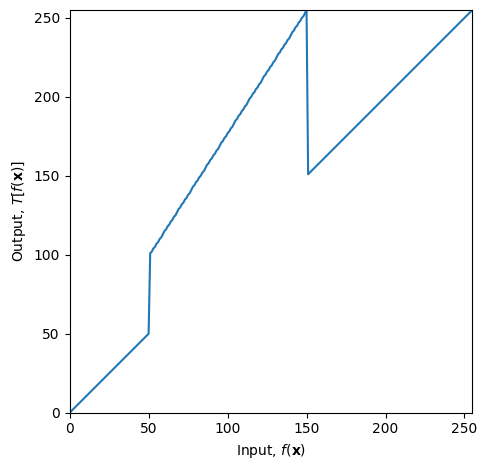

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
#print(len(transform))

fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

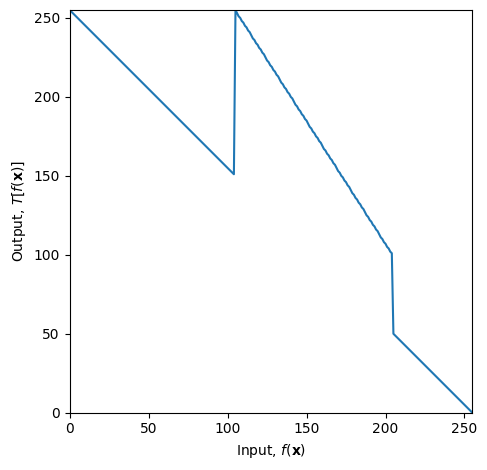

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

transform=np.flip(transform)        #flipping the intensity map array of ealier to get negative. 


fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()



img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)


image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()
plt.show()

# Question 3

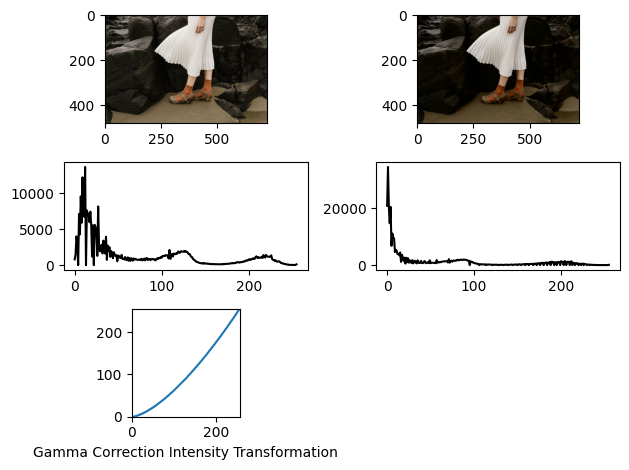

In [51]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)


img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)   # Convert the image to LAB color space
L_channel = img_lab[:, :, 0]  # Extract the L channel
# gamma correction to the L channel
gamma = 1.5 #possible value make image looking good.
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_channel_gamma = cv.LUT(L_channel, table)
img_lab_gamma = img_lab.copy()          # Replace the gamma corrected L channel in the LAB image
img_lab_gamma[:, :, 0] = L_channel_gamma
# Convert the LAB image with gamma corrected L channel back to RGB
img_gamma = cv.cvtColor(img_lab_gamma, cv.COLOR_LAB2BGR) 
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)


f, axarr = plt.subplots(3, 2)
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 1].imshow(img_gamma)
hist_orig = cv.calcHist([L_channel], [0], None, [256], [0, 256]) # Plot histograms for L channel
axarr[1, 0].plot(hist_orig, color='k')
hist_gamma = cv.calcHist([L_channel_gamma], [0], None, [256], [0, 256])
axarr[1, 1].plot(hist_gamma, color='k')



# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2, 0].set_xlabel("Gamma Correction Intensity Transformation")
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')
axarr[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


# Question 4

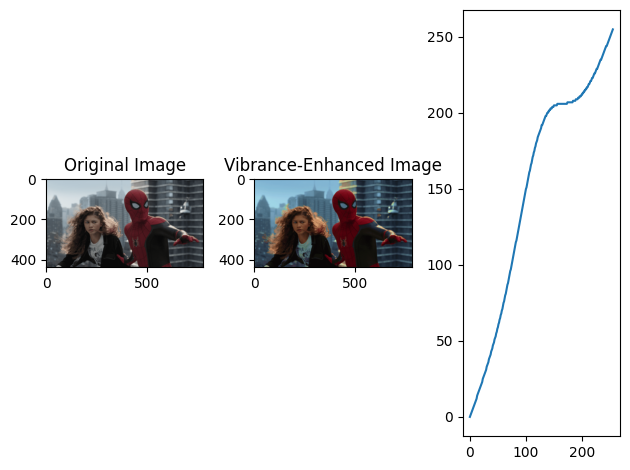

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('spider.png')


hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV) #BGR to HSV
hue, saturation, value = cv.split(hsv_image) # Split the HSV image into separate channels
a = 0.5
sigma=40
func=saturation+a*128*np.exp(-((saturation-128)**2)/(2*((sigma)**2)))
transform=np.minimum(func,255).astype('uint8')   # intensity transformation
enhanced_hsv_image = cv.merge((hue, transform, value))        # Combine the transformed saturation channel with hue and value
enhanced_image = cv.cvtColor(enhanced_hsv_image, cv.COLOR_HSV2BGR)

#to display in plot
input = np.arange(256)
output= np.minimum(input+a*128*np.exp(-((input-128)**2)/(2*(sigma)**2)),255).astype('uint8') #plot tansform

# Plot the images
f,ax=plt.subplots(1,3)
original=cv.cvtColor(image, cv.COLOR_BGR2RGB)
ax[0].imshow(original)
ax[0].set_title('Original Image')
enhanced_image = cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB) 
ax[1].imshow(enhanced_image)
ax[1].set_title('Vibrance-Enhanced Image')
ax[2].plot(input,output)
plt.tight_layout()
plt.show()


# Question 5

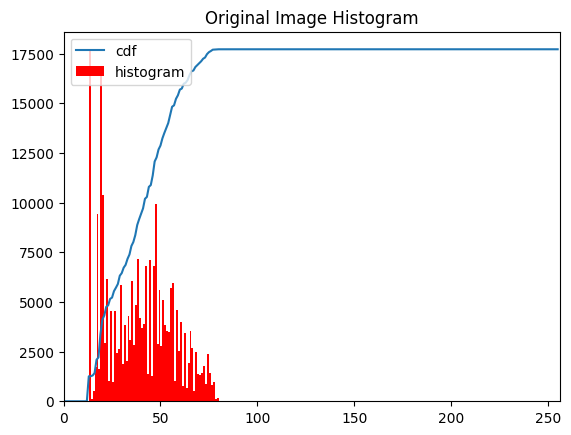

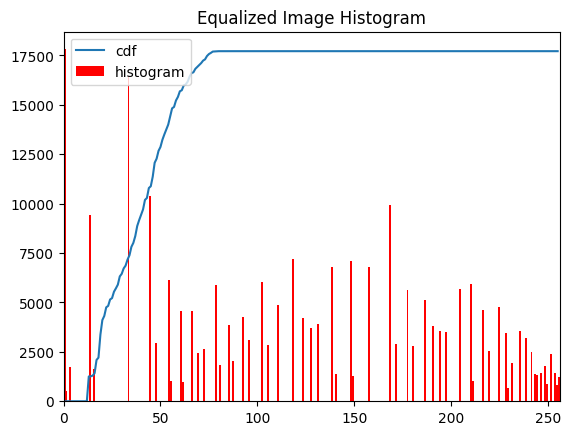

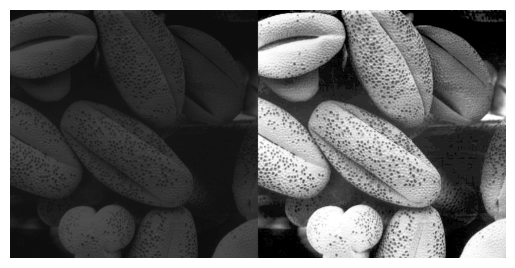

In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)


# defining a function for histogram equalization
def histo_normalized(image):
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equ = cv.equalizeHist(image)
    return cdf_normalized,equ
#apply hist equlize
cdf_normalized,equalize=histo_normalized(img)

# Plot cdf and histogram of the original img
plt.plot(cdf_normalized)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Original Image Histogram')
plt.show()
# Plot cdf and histogram of the equalized img
plt.plot(cdf_normalized)
plt.hist(equalize.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.title('Equalized Image Histogram')
plt.show()

# Display original,equalized
res = np.hstack((img, equalize))
plt.axis('off')
plt.imshow(res, cmap='gray')
plt.show()


# Question 6

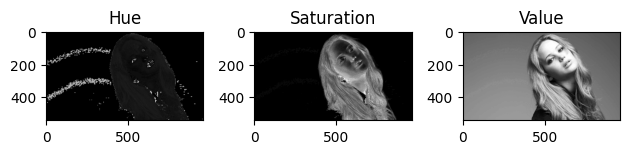

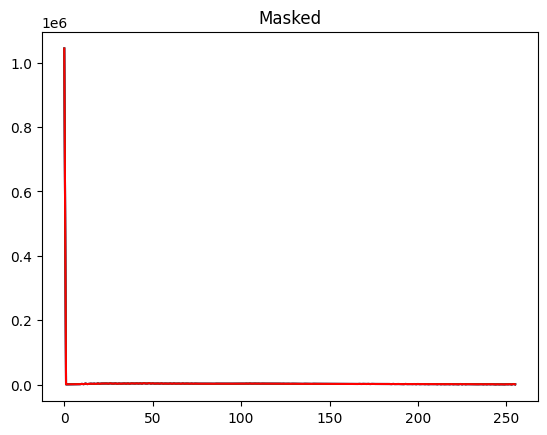

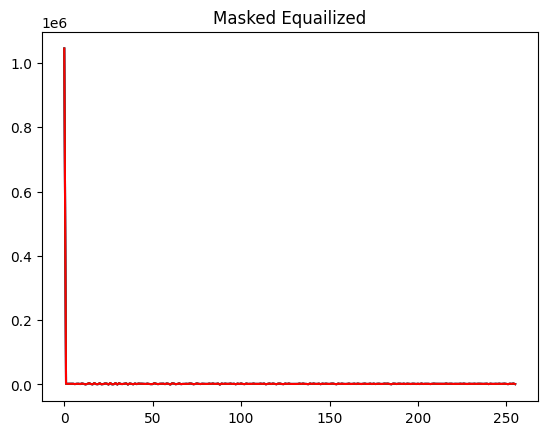

In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('jeniffer.jpg')


def resize_im(img,scale):
    new_width = int(img.shape[1] * scale)
    new_height = int(img.shape[0] * scale)
    img=cv.resize(img, (new_width, new_height))
    return img

image=resize_im(img,0.25)
cv.imshow('original',image)
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)  # Convert the image to the HSV 
hue, saturation, value = cv.split(hsv_image)  # Split the HSV ro H,S,V
plt.subplot(1,3, 1)
plt.imshow(hue, cmap='gray')
plt.title('Hue')
plt.subplot(1, 3, 2)
plt.imshow(saturation, cmap='gray')
plt.title('Saturation')
plt.subplot(1, 3, 3)
plt.imshow(value, cmap='gray')
plt.title('Value')
plt.tight_layout()
plt.show()


#choosing saturation plane to mask bcz there is foreground isolated clearly by intensity

threashold,t=cv.threshold(saturation,11,255,cv.THRESH_BINARY) 
masked=cv.bitwise_and(image,image,mask=t)
cv.imshow('masked', masked)
cv.imshow('masking image', t)  #t=mask image

color = ('b', 'g', 'r')

b, g, r = cv.split(masked)
array=[b,g,r]
array_new=[]

for i, c in enumerate(color):              #enumerate is usedhere, so i =0,1,2   (it only give lenghth of array based on  number of elemnets) and c = each elemnt
    hist, bins = np.histogram(masked.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    plt.plot(hist, color=c)                     #plot the graph for need color
    equi = cv.equalizeHist(array[i])
    array_new.append(equi)

plt.title("Masked")   
plt.show()


masked_new = cv.merge(array_new)

for i, c in enumerate(color):              #enumerate is usedhere, so i =0,1,2   (it only give lenghth of array based on  number of elemnets) and c = each elemnt
    hist, bins = np.histogram(masked_new.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    plt.plot(hist, color=c)                     #plot the graph for need color

plt.title("Masked Equailized")     
plt.show() 
 
background = cv.bitwise_not(t)  # Invert the foreground mask to get the background
bagr=cv.bitwise_and(image, image, mask=background)
result = cv.add(masked, bagr)


cv.imshow('result', result)
cv.waitKey(0)
cv.destroyAllWindows()


# Question 7

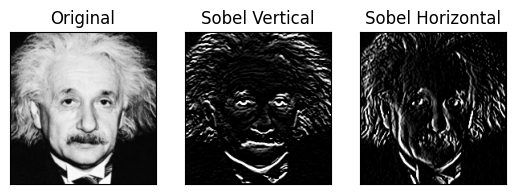

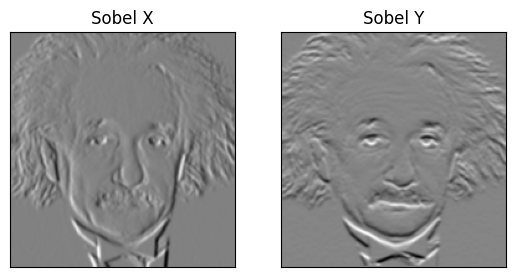

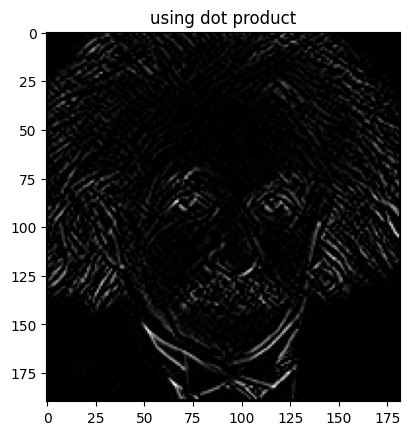

In [56]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Define the kernel for averaging
kernel = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

# Apply filter2D for vertical Sobel filtering
img_filtered = cv.filter2D(img, -1, kernel)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, sharex='all', sharey='all')

# Display the original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

# Display the filtered image
axes[1].imshow(img_filtered, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])



kernel1 = np.array([[-1, 0, 1],
                   [ -2,  0,  2],
                   [ -1,  0,  1]], dtype=np.float32)


img_filtered1 = cv.filter2D(img, -1, kernel1)

# Display the filtered image
axes[2].imshow(img_filtered1, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()




# Apply Sobel filter to the image for edge detection
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)  # Sobel filter in the x-direction
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)  # Sobel filter in the y-direction

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all')

axes[0].imshow(sobel_x, cmap='gray')
axes[0].set_title('Sobel X')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(sobel_y, cmap='gray')
axes[1].set_title('Sobel Y')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()




# Define the 1D row and column matrices for Sobel filter
sobel_x = np.array([[-1, 0, 1]])  # Sobel filter for detecting horizontal edges
sobel_y = np.array([[-1], [0], [1]])  # Sobel filter for detecting vertical edges

# Create the 2D Sobel filter by multiplying the row and column matrices
sobel_filterx = np.dot(sobel_y, sobel_x)

# Load an example image

# Apply Sobel filter to the image
img_filtered = cv.filter2D(img, -1, sobel_filterx)



# Display the filtered image using matplotlib
plt.imshow(img_filtered, cmap='gray')
plt.title('using dot product')
plt.show()




# Question 8

In [59]:
import cv2 as cv
import numpy as np

def zoom_nearest_neighbor(image, scale):
    height, width, channels = image.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            original_i = int(i / scale)
            original_j = int(j / scale)
            zoomed_image[i, j] = image[original_i, original_j]
    
    return zoomed_image



def zoom_bilinear(image, scale):
    height, width, channels = image.shape
    new_height = int(height * scale)
    new_width = int(width * scale)
    
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    for i in range(new_height):
        for j in range(new_width):
            # Calculate the corresponding coordinates in the original image
            original_i = i / scale
            original_j = j / scale
            
            
            i1, j1 = int(original_i), int(original_j)
            i2, j2 = min(i1 + 1, height - 1), min(j1 + 1, width - 1) #dimenstion shld not exceed image
            
            # Calculate the interpolation weights
            difx, dify = original_i - i1, original_j - j1 # 0.67,0.34
            w1 = (1 - difx) * (1 - dify)    #0.67 * 0.34
            w2 = difx * (1 - dify)
            w3 = (1 - difx) * dify
            w4 = difx * dify
            
            # Perform bilinear interpolation
            pixel_value = (image[i1, j1] * w1 + image[i1, j2] * w2 +
                           image[i2, j1] * w3 + image[i2, j2] * w4).astype(np.uint8)
            
            zoomed_image[i, j] = pixel_value
    
    return zoomed_image

large_im = cv.imread('im01.png')
small_im = cv.imread('im01small.png')


def calculate_ssd(image1, image2):
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    squared_diff = np.square(diff)
    ssd = np.sum(squared_diff)

    return ssd

zoomed_large = zoom_nearest_neighbor(large_im, 4)              #uncomment to see nearest neighbour
zoomed_small=zoom_nearest_neighbor(small_im, 4)
# zoomed_large = zoom_bilinear(large_im, 4)
# zoomed_small=zoom_bilinear(small_im, 4)
zoomed_large = cv.resize(zoomed_large, (zoomed_small.shape[1], zoomed_small.shape[0]))

cv.imshow('Large', large_im)
cv.imshow('Small', small_im)
cv.imshow('ZLarge', zoomed_large)
cv.imshow('ZSmall', zoomed_small)

ssd_value = calculate_ssd(zoomed_large, zoomed_small)
print(f'SSD Value: {ssd_value}')

cv.waitKey(0)
cv.destroyAllWindows()


ValueError: operands could not be broadcast together with shapes (4320,7680,3) (1080,1920,3) 

# Question 9  

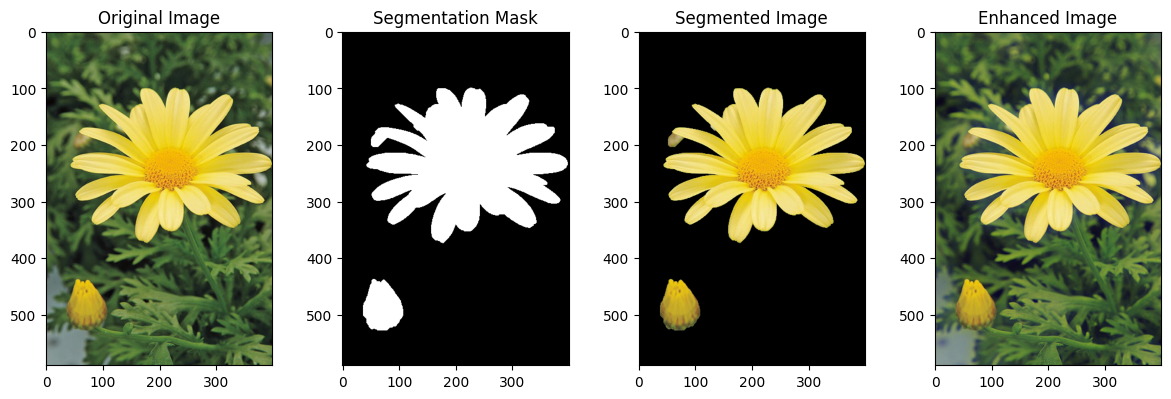

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('yellow.png')

# Use grabCut to segment the image
mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (10, 10, image.shape[1] - 10, image.shape[0] - 10)  # Define a rough rectangle around the flower
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = image * mask2[:, :, np.newaxis]


blurred_background = cv2.GaussianBlur(image, (0, 0), 10)

# Apply the mask to keep the flower in focus, the background blurred
enhanced_image = image.copy()
enhanced_image[np.where(mask2[:, :, np.newaxis] == 0)] = blurred_background[np.where(mask2[:, :, np.newaxis] == 0)]

plt.figure(figsize=(12, 4))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(142)
plt.title('Segmentation Mask')
plt.imshow(mask2, cmap='gray')

plt.subplot(143)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))

plt.subplot(144)
plt.title('Enhanced Image')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

